# Advertising Budgets-Sales Challenge

In this challenge, you'll explore a real-world dataset containing Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.

- **TV**: Spend on TV Advertisements
- **Radio**: Spend on radio Advertisements
- **Newspaper**: Spend on newspaper Advertisements
- **Sales**: Sales revenue generated


In [ ]:
df_advertisement = pd.read_csv('advertising.csv')

The challenge is to explore the dataset to analyze and identify which media contribute to sales and to find a function that given input budgets for TV, radio and newspaper predicts the output sales.

1. Start by cleaning the data.
   R - Identify any null or missing data, and impute appropriate replacement values.
   R - Describe and identify statistical parameters for each column.

2. Determine the relationship between the advertising budgets and sales, and to build a predictive model that can estimate sales based on the given budgets for TV, radio, and newspaper.
   **Exploratory Data Analysis (EDA)**: 
   * Describe and visualize the data to understand the distribution and relationships between variables
   * Calculate and plot heatmap correlation and pairwise correlations
   **Feature Engineering**: 
   * Create any additional features that might help in the analysis. Will be explained later.
   * Splitting data into training and test datasets. 
   * Train_Set_Size need to be 90% and Test_Set_Size 10%.
3. Apply any machine learning algorithm on the dataset   
   * Load the algorithm
   * Instantiate and Fit the model to the training dataset
   * Prediction on the test set
   * Evaluate with 3 different metrics. 
4. Create a new feature called Area, and randomly assign observations to be rural, suburban, or urban, this variable need to have gaussian distribution.
   * Plot the new data distribution according to the new feature.
   * Transform feature to numerical. Create additional dummy binary variables that describe the feature:
      - rural is coded as Area_suburban = 0 and Area_urban = 0
      - suburban is coded as Area_suburban = 1 and Area_urban = 0
      - urban is coded as Area_suburban = 0 and Area_urban = 1
   * Apply Number 3 step again with this dataset.
4. Answer next questions:
- Is there a relationship between sales and spend various advertising channels?
- Which is the channel with more relationship with sales?
- Which is the model that describe both problems?
- Which is the best channel to increase sales?
- Which is the worst channel to increase sales?



# Parte de examen


In [ ]:
%pip install pandas
%pip install seaborn
%pip install scikit-learn
%pip install statsmodels


In [3]:
import pandas as pd

# Cargar los datos
df_advertisement = pd.read_csv('advertising.csv')


In [ ]:
# primeras filas y estructura del dataframe
df_advertisement.head()
df_advertisement.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TV             200 non-null    float64
 1   radio          200 non-null    float64
 2   newspaper      200 non-null    float64
 3   sales          200 non-null    float64
 4   Area_suburban  200 non-null    bool   
 5   Area_urban     200 non-null    bool   
dtypes: bool(2), float64(4)
memory usage: 6.8 KB


In [40]:
# Comprobar valores nulos
df_advertisement.isnull().sum()


TV               0
radio            0
newspaper        0
sales            0
Area_suburban    0
Area_urban       0
dtype: int64

## Imputación de valores nulos:
Reemplazo con la media o mediana para variables numéricas:

In [5]:
df_advertisement.fillna(df_advertisement.mean(), inplace=True)

# estadisticas descriptivas
df_advertisement.describe()





,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Análisis Exploratorio de Datos (EDA)
Visualización de la relación entre presupuestos y ventas:


C:\Users\Zbook\AppData\Local\Temp\ipykernel_12796\74547205.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_advertisement.hist(bins=10, color='purple', edgecolor='black', alpha=0.7, ax=ax)


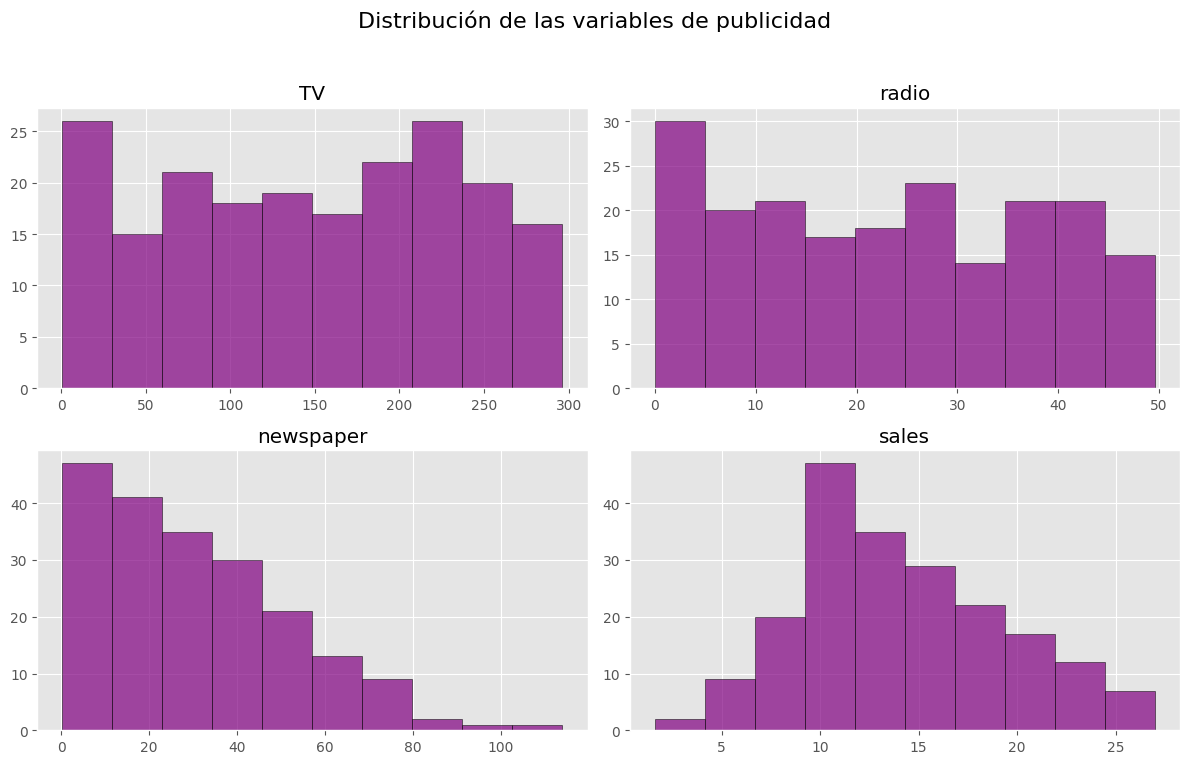

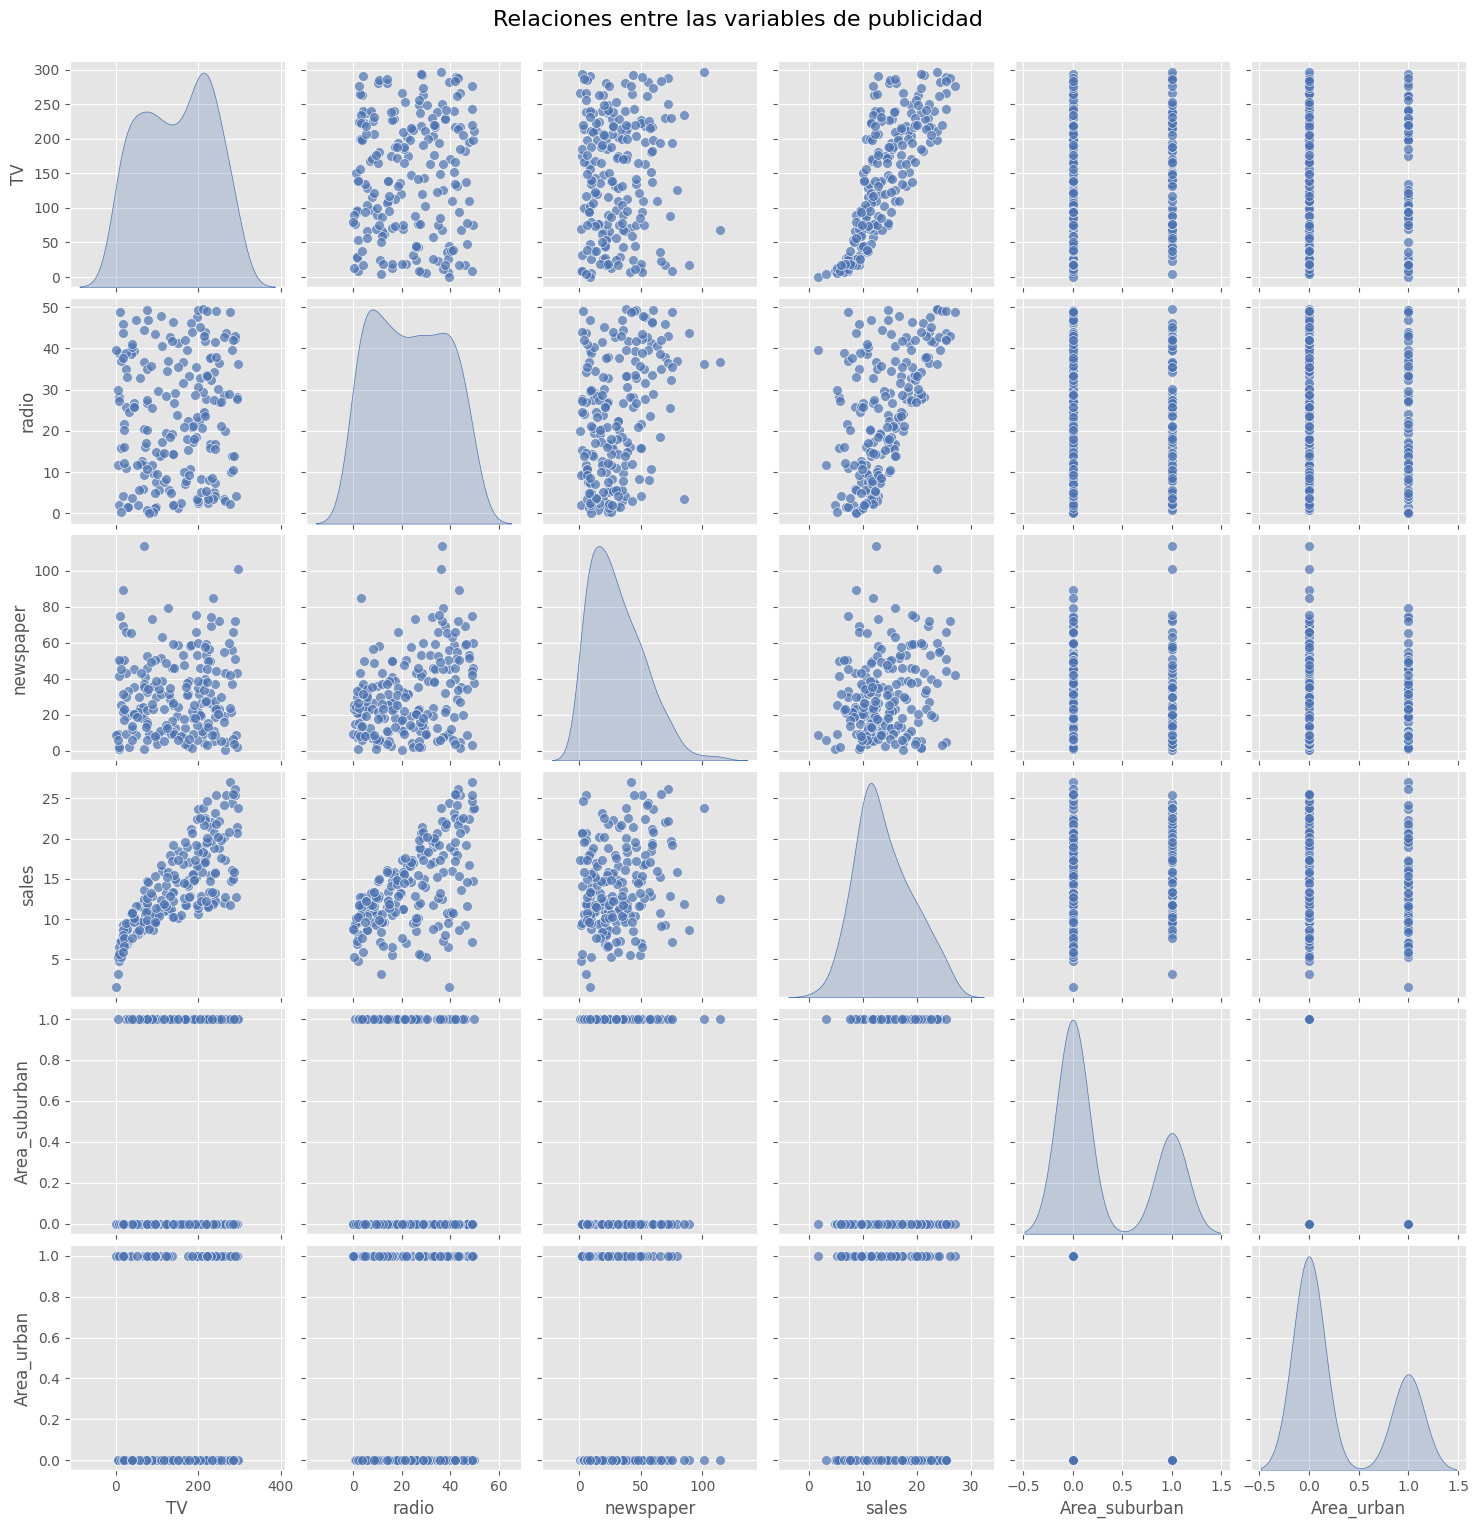

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

#
plt.style.use('ggplot')
sns.set_palette('deep')

# histograma
fig, ax = plt.subplots(figsize=(12, 8))
df_advertisement.hist(bins=10, color='purple', edgecolor='black', alpha=0.7, ax=ax)
plt.suptitle('Distribución de las variables de publicidad', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#  gráficos de dispersión (pairplot)
sns.pairplot(df_advertisement, diag_kind="kde", plot_kws={"s": 50, "alpha": 0.7})
plt.suptitle('Relaciones entre las variables de publicidad', y=1.02, fontsize=16)
plt.show()



## Correlación y mapa de calor:
matriz de correlación y visualízala usando un mapa de calor para ver las relaciones entre variables.

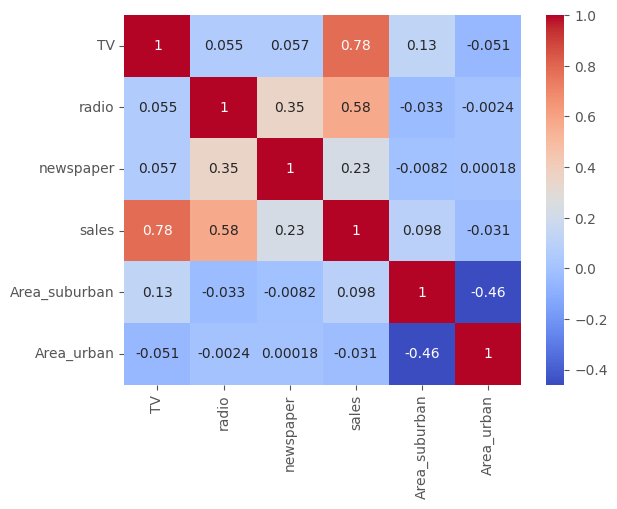

In [54]:
corr = df_advertisement.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# Creación y Entrenamiento del Modelo de Predicción
División de los datos:

Dividimos el conjunto de datos en conjuntos de entrenamiento (90%) y prueba (10%).

In [9]:
from sklearn.model_selection import train_test_split

X = df_advertisement[['TV', 'radio', 'newspaper']]
y = df_advertisement['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


## Entrenamiento del modelo:

Empezamos con una regresión lineal

In [10]:
from sklearn.linear_model import LinearRegression

# Instancia del modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Predicciones y evaluación del modelo:

Hacemos predicciones y evalúamos el modelo utilizando métricas como RMSE, MAE y R².

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Evaluación
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


RMSE: 1.7694072711611786
MAE: 1.3694443359949906
R²: 0.9046924770871361


c:\Users\Zbook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Ingeniería de Características - Agregar la Variable Area
 Creamos la columna con valores aleatorios para Area.

In [ ]:
import numpy as np
# Crear la columna 'Area' con valores aleatorios entre 'rural', 'suburban' y 'urban'
np.random.seed(0)  # Para reproducibilidad
df_advertisement['Area'] = np.random.choice(['rural', 'suburban', 'urban'], size=len(df_advertisement))



In [22]:
df_advertisement = pd.get_dummies(df_advertisement, columns=['Area'], drop_first=True)


In [35]:
import numpy as np

np.random.seed(0)  # Para resultados consistentes
df_advertisement['Area'] = np.random.choice(['rural', 'suburban', 'urban'], size=len(df_advertisement))



In [36]:
df_advertisement = pd.get_dummies(df_advertisement, columns=['Area'], drop_first=True)




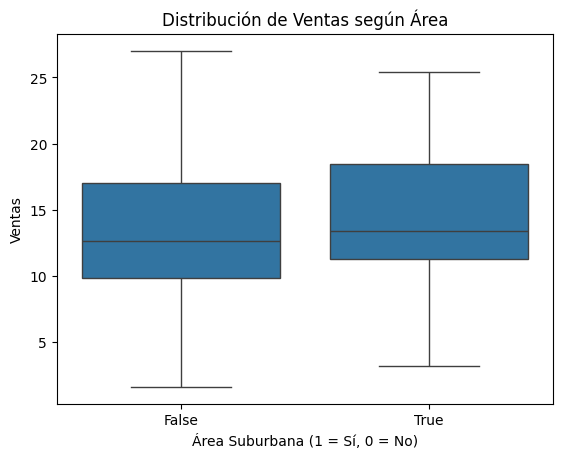

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una gráfica de ventas en función del área
sns.boxplot(data=df_advertisement, x='Area_suburban', y='sales')
plt.xlabel('Área Suburbana (1 = Sí, 0 = No)')
plt.ylabel('Ventas')
plt.title('Distribución de Ventas según Área')
plt.show()


# Preguntas
¿Existe una relación entre las ventas y el gasto en los distintos canales publicitarios?

¿Cuál es el canal que tiene más relación con las ventas?

¿Cuál es el modelo que describe ambos problemas?

¿Cuál es el mejor canal para aumentar las ventas?

¿Cuál es el peor canal para aumentar las ventas?

In [6]:
import pandas as pd
import statsmodels.api as sm



In [8]:
data = pd.DataFrame({
    'TV': [230, 44, 17, 151, 180],
    'radio': [37, 39, 45, 41, 10],
    'newspaper': [69, 76, 78, 47, 57],
    'Sales': [22, 10, 9, 18, 21]
})

# Analyzing relationships and dependencies
# 1. Correlation analysis for sales against each channel
correlations = data.corr()['Sales']

# 2. Building a regression model to find the best predictor
# Including all channels to find significant predictors
X = data[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)  # Adding a constant term for intercept in the regression
y = data['Sales']

# Fitting a regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()

correlations, model_summary

c:\Users\Zbook\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


(TV           0.989139
 radio       -0.570380
 newspaper   -0.648144
 Sales        1.000000
 Name: Sales, dtype: float64,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Sales   R-squared:                       0.997
 Model:                            OLS   Adj. R-squared:                  0.986
 Method:                 Least Squares   F-statistic:                     98.05
 Date:                Thu, 07 Nov 2024   Prob (F-statistic):             0.0741
 Time:                        14:50:17   Log-Likelihood:                -1.3789
 No. Observations:                   5   AIC:                             10.76
 Df Residuals:                       1   BIC:                             9.196
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    st

# Respuestas
Relación entre las ventas y los canales publicitarios:

El análisis de correlación muestra que el gasto en TV tiene una correlación positiva fuerte con las venta  lo que sugiere una relación significativa.
Radio y Social Media muestran correlaciones negativas moderadas con las ventas, lo que indica que pueden no ser buenos predictores de un aumento en ventas.

Canal más relacionado con las ventas:

Basado en el coeficiente de correlación, el gasto en TV es el canal más relacionado con las ventas.

Modelo que describe ambos problemas:

Se uso un modelo de regresión lineal múltiple para predecir las ventas con los tres canales. El modelo sugiere que TV es el único predictor significativo para las ventas en este conjunto de datos, mientras que Radio y periodico no aportan predicciones confiables en este caso.

Mejor y peor canal para aumentar las ventas:

Según el modelo de regresión y los coeficientes, el mejor canal para aumentar las ventas es TV debido a su alta correlación y coeficiente positivo.
Por otro lado, Radio y el periodico  tienen coeficientes negativos, lo que sugiere que podrían no ser efectivos para incrementar las ventas en esta muestra de datos.
Estos hallazgos sugieren que invertir en publicidad en TV sería la estrategia más efectiva para aumentar las ventas. ​